<a href="https://colab.research.google.com/github/erikaminarikova/Ordinal_Sums/blob/main/Example_4_calculate_ordinal_sums_with_different_params.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import statistics

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import image

In [21]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test_data.csv',sep=";")

In [22]:
#ordina sums functions

# defining the generic functions for individual classes
def yes_function(x: float, y: float, a: float, kappa: float, lam: float, gamma: float = 1) -> float:
    return 1-max(0.0, (((1-x) ** kappa) + ((1-y) ** kappa) - ((1-a) ** kappa))) ** (1 / kappa)

def no_function(x: float, y: float, a: float, kappa: float, lam: float, gamma: float = 1) -> float:
        return max(0.0, ((x ** lam) + (y ** lam) - (a ** lam))) ** (1 / lam)

def maybe_function(x: float, y: float, a:float, kappa: float, lam: float, gamma: float = 1) -> float:
    if gamma == 0:
            # r = 0 means we use the geometric mean
        return 0
    elif gamma < 0:
            # r < 0 means we handle cases where x or y are 0
        if x == 0 or y == 0:
            return 0
        else:
                value = gamma*1/a*x*y+(1-gamma)*(1-1/(1-a)*(1-x)*(1-y))

    else:
            value = gamma*1/a*x*y+(1-gamma)*(1-1/(1-a)*(1-x)*(1-y))

    return statistics.median([0, 1, value])

# defining function for classification: deviding values according thir value to which fuction we use
def classification(x: float, y: float, a: float, kappa: float, lam: float, gamma: float) -> float:
    if x<a and y<a:
        value = no_function(x,y,a,1,lam,1)
    elif x>a and y>a:
        value = yes_function(x,y,a,kappa,1,1)
    else:
        value = maybe_function(x,y,a,1,1,gamma)
    return round(value,4)

In [23]:
# calculate the results with ordinal sums

#calculate for 2 attributes
df['result_neutral'] = df.apply(lambda row: classification(row['x'], row['y'], 0.5, 1, 1, 0.5), axis = 1)
df['result_nilpotent'] = df.apply(lambda row: classification(row['x'], row['y'], 0.5, 3.75, 3.75, 0.85), axis = 1)
df['result_strict'] = df.apply(lambda row: classification(row['x'], row['y'], 0.5, 0.05, 0.05, 0.15), axis = 1)

print(df)


       x     y  result_neutral  result_nilpotent  result_strict
0   0.00  0.00            0.00            0.0000         0.0000
1   0.25  0.23            0.00            0.0000         0.1118
2   0.25  0.35            0.10            0.0000         0.1728
3   0.40  0.40            0.30            0.0000         0.3192
4   0.42  0.96            0.88            0.8285         0.9315
5   0.00  0.50            0.00            0.0000         0.0000
6   0.80  0.20            0.50            0.3740         0.6260
7   0.00  1.00            0.50            0.1500         0.8500
8   1.00  0.00            0.50            0.1500         0.8500
9   0.02  0.98            0.50            0.1774         0.8226
10  0.80  0.55            0.85            1.0000         0.8209
11  0.80  0.70            1.00            1.0000         0.8829
12  0.80  0.80            1.00            1.0000         0.9234
13  0.96  0.69            1.00            1.0000         0.9768
14  1.00  1.00            1.00          

In [24]:
df.sort_values(by=['result_neutral'])

,x,y,result_neutral,result_nilpotent,result_strict
0,0.00,0.00,0.00,0.0000,0.0000
1,0.25,0.23,0.00,0.0000,0.1118
5,0.00,0.50,0.00,0.0000,0.0000
2,0.25,0.35,0.10,0.0000,0.1728
3,0.40,0.40,0.30,0.0000,0.3192
6,0.80,0.20,0.50,0.3740,0.6260
7,0.00,1.00,0.50,0.1500,0.8500
8,1.00,0.00,0.50,0.1500,0.8500
9,0.02,0.98,0.50,0.1774,0.8226
10,0.80,0.55,0.85,1.0000,0.8209


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/learning_output.csv')

In [18]:
def view_chart(a, kappa, lam):
    """ if df:
        variables_for_plot = st.multiselect('Select 2 dependent variables for plot:', df.columns, max_selections=2)
        if variables_for_plot:
            df_for_plot = df[variables_for_plot]
            x=df_for_plot.iloc[:, 0]
            y=df_for_plot.iloc[:, 1]
            plt.scatter(x,y) """

    y = np.arange(0, 1, 0.01)
    x = [a] * len(y)
    plt.scatter(x, y, c = 'black', s = 1)

    x = np.arange(0, 1, 0.01)
    y = [a] * len(x)
    plt.scatter(x, y, c = 'black', s = 1)

    y1 = np.arange(a, 1.0, 0.001)
    b=1
    x1 = 1-((1-a)**kappa-(1-y1)**kappa)**(1/kappa)
    plt.plot(x1, y1, c = 'red')
    #plt.fill_between(y1,x1, b, color='red')

    y2 = np.arange(0, a, 0.01)
    x2 = ((a**lam)-(y2**lam))**(1/lam)
    plt.plot(y2, x2, c = 'green')
    #plt.fill_between(y2,x2,color='green')

    # y3 = np.arange(a, 1.01, 0.01)
    # x3 = 1-(((1-a)**kappa)-((1-y3)**kappa))**(1/kappa)
    # z = np.min(b, x2)
    #plt.fill_between(y3,x3,y2=0, color='blue')

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.figure(figsize=(4, 4))

    return (plt)

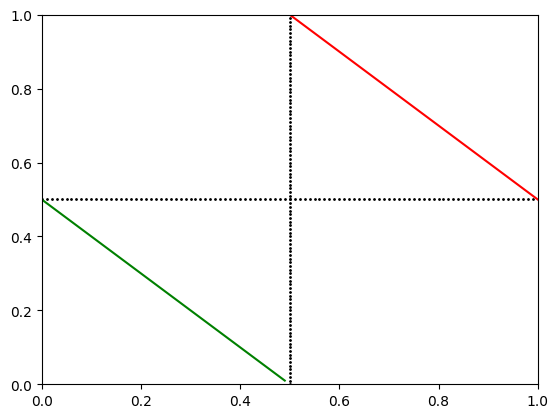

<Figure size 400x400 with 0 Axes>

In [19]:
# df = pd.DataFrame()
# chart = view_chart(df, 0.2305, 0.8658, 3.7278, 0.9559)
chart = view_chart(0.5,1,1)
chart.show()